# Churn of clients
For Telecom X

## The problem:

I was hired as a data analyst to work on a specific project of Churn of clients for the enterprise 'Telecom X'. The enterprise faces a high index of evasion of clients and needs to identify the cause.  
My task is to analyze the provided data, clean it, and perform exploratory analysis, to then provide it to the data science team, who will perform a predictive analysis to determine the cause of evasion of clients.

## Importing data

Importing libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('../data/processed/data_transformed.csv')
data.head()

,churn,is_elder,have_partner,have_dependents,permanence_months,type_internet_service,have_online_security,have_tech_support,type_contract,electronic_invoice,payment_method,charges_monthly,charges_total,charge_daily
0,0,0,1,1,9,dsl,0,1,anual,1,mailed check,65.6,593.30,2.186667
1,0,0,0,0,9,dsl,0,0,monthly,0,mailed check,59.9,542.40,1.996667
2,1,0,0,0,4,fiber optic,0,0,monthly,1,electronic check,73.9,280.85,2.463333
3,1,1,1,0,13,fiber optic,0,0,monthly,1,electronic check,98.0,1237.85,3.266667
4,1,1,1,0,3,fiber optic,0,1,monthly,1,mailed check,83.9,267.40,2.796667


After analyze the information the key columns are:  
>  - ``` Churn```
>  - ``` customer.SeniorCitizen```
>  - ``` customer.Partner```
> - ``` customer.Dependents```
> - ``` customer.ternure```
> - ``` internet.InternetService```
> - ``` internet.OnlineSecurit```
> - ``` internet.TechSupport```
> - ``` account.Contract```
> - ``` account.PaperlessBilling```
> - ``` account.PaymentMethod```
> - ``` account.Charges.Monthly```
> - ``` account.Charges.Total```


In [57]:
data.describe()

,churn,is_elder,have_partner,have_dependents,permanence_months,have_online_security,have_tech_support,electronic_invoice,charges_monthly,charges_total,charge_daily
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.286547,0.290102,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.452180,0.453842,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


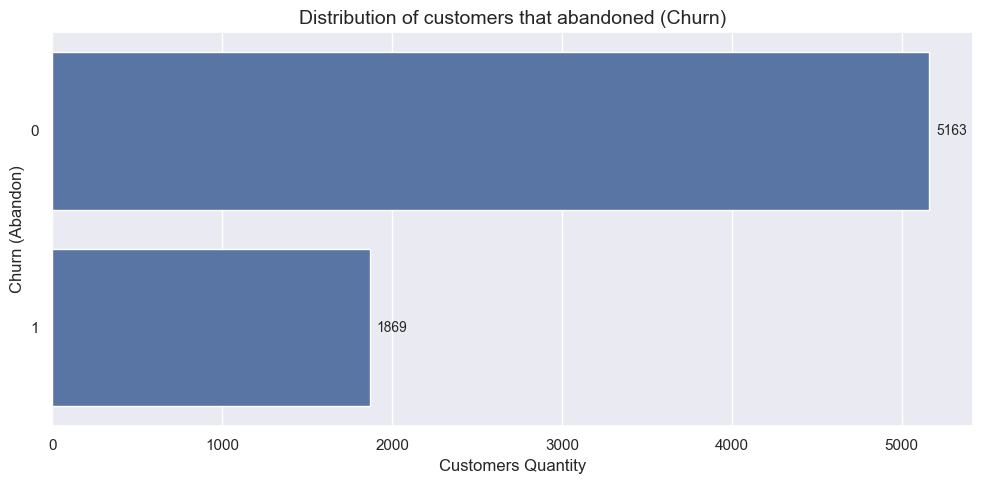

In [63]:
sns.set_theme(style='darkgrid')

# Estilo de gráfico
plt.figure(figsize=(10, 5))

ax = sns.countplot(data=data, y='churn', order=data['churn'].value_counts().index)

# Añadir etiquetas con el valor al final de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fontsize=10)

# Títulos y etiquetas
plt.title('Distribution of customers that abandoned (Churn)', fontsize=14)
plt.xlabel('Customers Quantity')
plt.ylabel('Churn (Abandon)')
plt.tight_layout()
plt.show()

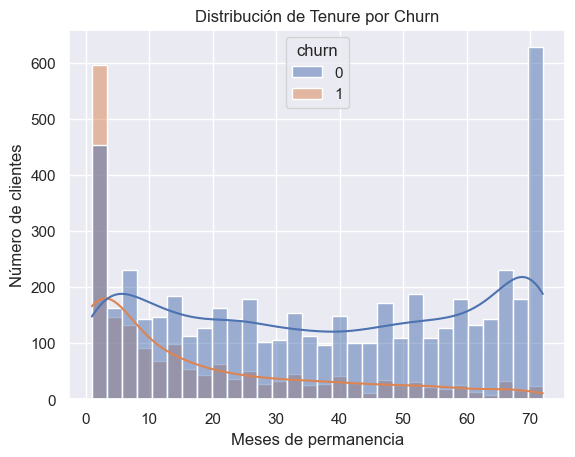

In [61]:
sns.histplot(data=data, x='permanence_months', hue='churn', bins=30, kde=True)
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Meses de permanencia')
plt.ylabel('Número de clientes')
plt.show()

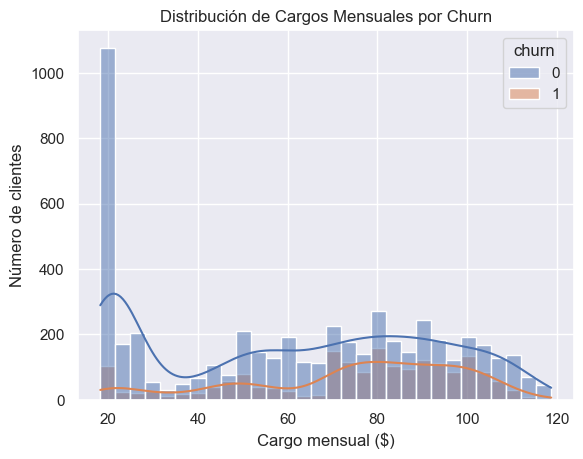

In [49]:
sns.histplot(data=data, x='charges_monthly', hue='churn', bins=30, kde=True)
plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Cargo mensual ($)')
plt.ylabel('Número de clientes')
plt.show()

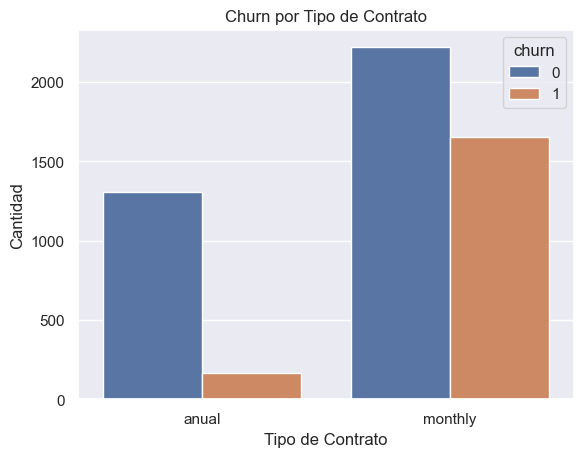

In [50]:
sns.countplot(data=data, x='type_contract', hue='churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.show()

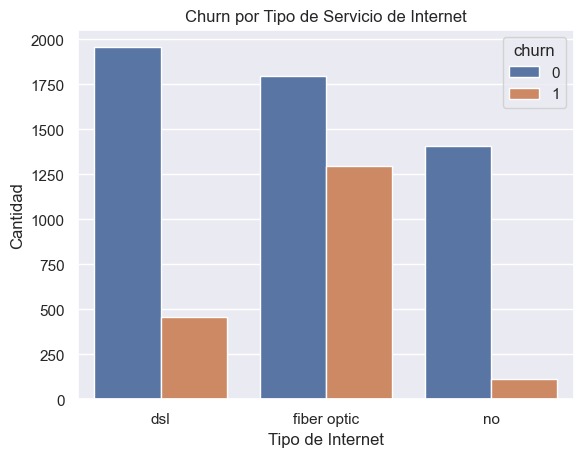

In [52]:
sns.countplot(data=data, x='type_internet_service', hue='churn')
plt.title('Churn por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad')
plt.show()

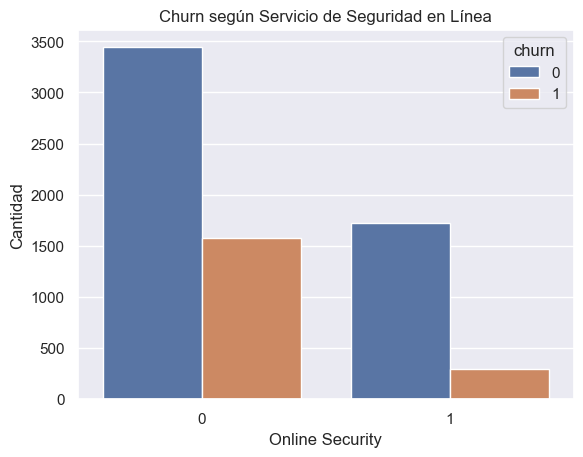

In [54]:
sns.countplot(data=data, x='have_online_security', hue='churn')
plt.title('Churn según Servicio de Seguridad en Línea')
plt.xlabel('Online Security')
plt.ylabel('Cantidad')
plt.show()

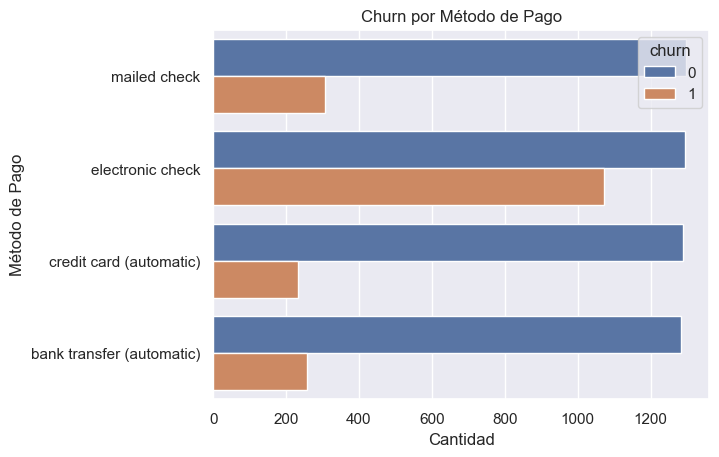

In [55]:
sns.countplot(data=data, y='payment_method', hue='churn')
plt.title('Churn por Método de Pago')
plt.xlabel('Cantidad')
plt.ylabel('Método de Pago')
plt.show()

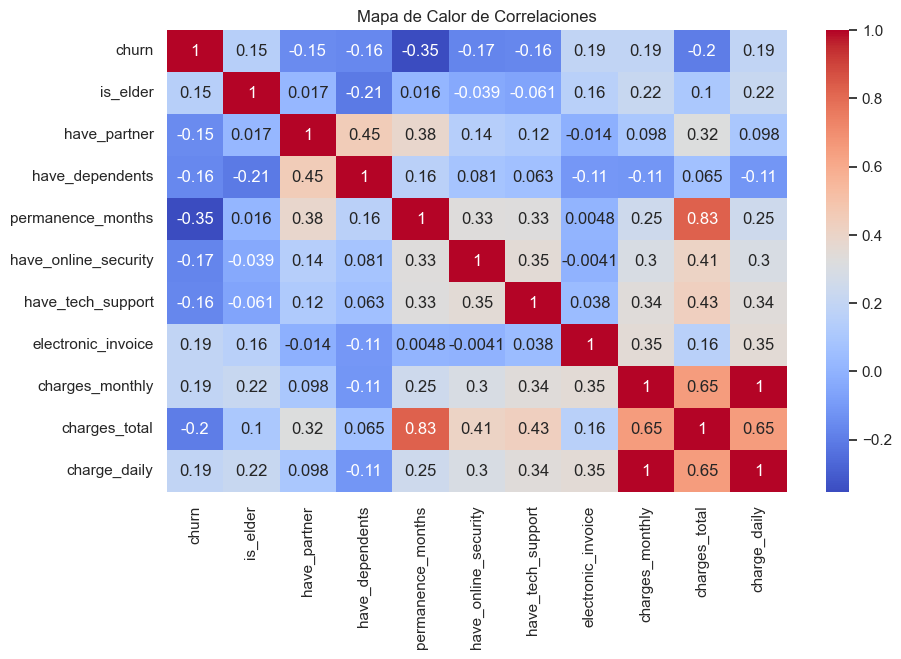

In [56]:
# Filtrar columnas numéricas
numericas = data.select_dtypes(include=['number'])

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()